In [14]:
import pandas as pd
import numpy as np
from dplython import (DplyFrame, X, diamonds, select, sift, sample_n, sample_frac, arrange, mutate, group_by, summarize)

from lifelines import KaplanMeierFitter

import matplotlib.pyplot as plt
%matplotlib inline
%config IPCompleter.greedy=True

In [91]:
data_path = '/Users/genie/data/game_of_thrones/got_characters_s1_to_s7.csv'
character_df = pd.read_csv(data_path,quotechar='"',na_values='',encoding = "ISO-8859-1")

In [92]:
# def calc_total_screen_time(x):
#     temp = 0.00
#     for i in range(1,8):
#         temp = float(temp) + x['s'+str(i)+'_'+'screenTime']
#     return float(round(temp,2))

# def calc_num_episodes_appeared_in(x):
#     temp = 0.00
#     for i in range(1,8):
#         temp = float(temp) + x['s'+str(i)+'_'+'episodes']
#     return float(round(temp,2))

# character_df['total_screen_time'] = character_df.apply(calc_total_screen_time, axis=1)
# character_df['num_of_episodes'] = character_df.apply(calc_num_episodes_appeared_in, axis=1)

character_df['total_screen_time'] = character_df.apply(lambda x: sum([x['s'+str(i)+'_screenTime'] for i in range(1,8)]), axis=1)
character_df['num_of_episodes_appeared'] = character_df.apply(lambda x: sum([x['s'+str(i)+'_episodes'] for i in range(1,8)]), axis=1)
character_df['num_of_people_killed'] = character_df.apply(lambda x: sum([x['s'+str(i)+'_numKilled'] for i in range(1,8)]), axis=1)

character_df['spouse'] = character_df['spouse'].fillna('') 
character_df['is_married'] = character_df.apply(lambda x: (0 if x['spouse']=='' else 1), axis=1)

character_df['siblings'] = character_df['siblings'].fillna('') 
character_df['have_siblings'] = character_df.apply(lambda x: (0 if x['siblings']=='' else 1), axis=1)                                                

character_df['parent_of'] = character_df['parent_of'].fillna('') 
character_df['have_children'] = character_df.apply(lambda x: (0 if x['parent_of']=='' else 1), axis=1)                                                

# remove unwanted variables
character_df = character_df.drop(['s'+str(i)+'_screenTime' for i in range(1,8)], axis=1)
character_df = character_df.drop(['s'+str(i)+'_shareOfScreenTime' for i in range(1,8)], axis=1)
character_df = character_df.drop(['s'+str(i)+'_episodes' for i in range(1,8)], axis=1)
character_df = character_df.drop(['s'+str(i)+'_numKilled' for i in range(1,8)], axis=1)
character_df = character_df.drop(['s'+str(i)+'_numOfCharactersInteractedWith' for i in range(1,8)], axis=1)
character_df = character_df.drop(['spouse','parents','siblings','parent_of','manner_of_death','killed_by','dead_in_season'], axis=1)
                                                                                 

In [93]:
character_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 48 columns):
character_name              368 non-null object
gender                      147 non-null object
house                       86 non-null object
royal                       368 non-null int64
kingsguard                  368 non-null int64
s1_bc                       368 non-null float64
s1_ec                       368 non-null float64
s1_pagerank                 368 non-null float64
s1_hub                      368 non-null float64
s1_authority                368 non-null float64
s2_bc                       368 non-null float64
s2_ec                       368 non-null float64
s2_pagerank                 368 non-null float64
s2_hub                      368 non-null float64
s2_authority                368 non-null float64
s3_bc                       368 non-null float64
s3_ec                       368 non-null float64
s3_pagerank                 368 non-null float64
s3_hub               

In [81]:
character_df.head()

,character_name,gender,house,royal,kingsguard,s1_bc,s1_ec,s1_pagerank,s1_hub,s1_authority,...,s7_authority,is_dead,dead_in_season,duration_in_episodes,total_screen_time,num_of_episodes_appeared,num_of_people_killed,is_married,have_siblings,have_children
0,Addam Marbrand,NaN,NaN,0,0,0.0024,0.0003,0.0013,0.0009,0.0009,...,0.0,0,NaN,67,5.08,1,0,0,0,0
1,Aegon Targaryen,NaN,Targaryen,1,0,0.0000,0.0000,0.0007,0.0000,0.0000,...,0.0,0,NaN,67,0.00,0,0,0,1,0
2,Aeron Greyjoy,NaN,Greyjoy,0,0,0.0000,-0.0000,0.0007,0.0000,0.0000,...,0.0,0,NaN,67,20.34,2,1,0,1,0
3,Aerys II Targaryen,NaN,Targaryen,1,0,0.0000,-0.0000,0.0007,0.0000,0.0000,...,0.0,0,NaN,67,0.00,0,0,1,1,1
4,Akho,NaN,NaN,0,0,0.0000,0.0000,0.0007,0.0000,0.0000,...,0.0,1,s6,54,29.70,3,0,0,0,0


In [82]:
kmf = KaplanMeierFitter()
kmf.fit(durations = character_df.duration_in_episodes, event_observed = character_df.is_dead)

<lifelines.KaplanMeierFitter: fitted with 368 observations, 203 censored>

In [18]:
# kmf.median_

In [19]:
# kmf.event_table

In [83]:
kmf.predict(67)

0.5516304347826084

In [20]:
# kmf.survival_function_

In [21]:
# kmf._conditional_time_to_event_()

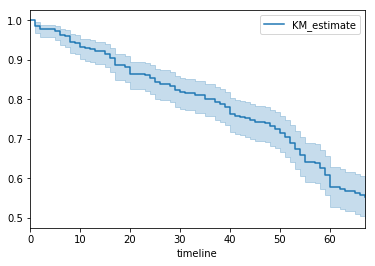

In [84]:
kmf.plot_survival_function()

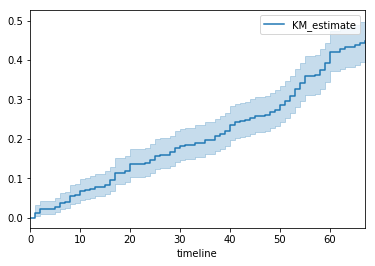

In [85]:
kmf.plot_cumulative_density()

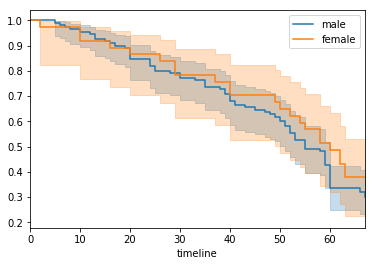

In [86]:
groups = character_df['gender']
g1 = (groups == 'male')
g2 = (groups == 'female')

kmf = KaplanMeierFitter()
kmf.fit(character_df['duration_in_episodes'][g1], character_df['is_dead'][g1], label='male')
ax = kmf.plot()

kmf.fit(character_df['duration_in_episodes'][g2], character_df['is_dead'][g2], label='female')
ax = kmf.plot(ax=ax)

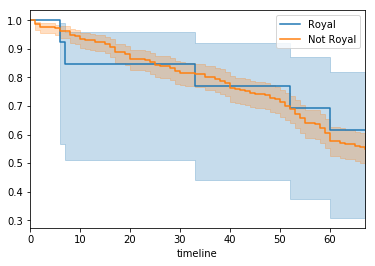

In [87]:
groups = character_df['royal']
g1 = (groups == 1)
g2 = (groups == 0)

kmf = KaplanMeierFitter()
kmf.fit(character_df['duration_in_episodes'][g1], character_df['is_dead'][g1], label='Royal')
ax = kmf.plot()

kmf.fit(character_df['duration_in_episodes'][g2], character_df['is_dead'][g2], label='Not Royal')
ax = kmf.plot(ax=ax)

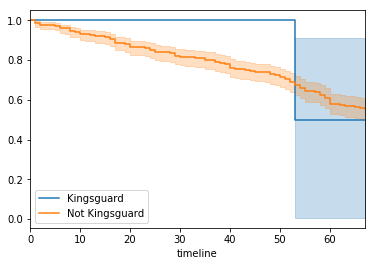

In [88]:
groups = character_df['kingsguard']
g1 = (groups == 1)
g2 = (groups == 0)

kmf = KaplanMeierFitter()
kmf.fit(character_df['duration_in_episodes'][g1], character_df['is_dead'][g1], label='Kingsguard')
ax = kmf.plot()

kmf.fit(character_df['duration_in_episodes'][g2], character_df['is_dead'][g2], label='Not Kingsguard')
ax = kmf.plot(ax=ax)

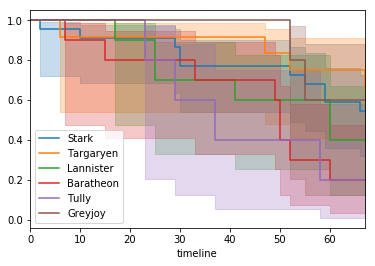

In [89]:
kmf = KaplanMeierFitter()

kmf.fit(character_df[(character_df.house.notnull()) & (character_df.house.str.contains('Stark'))]['duration_in_episodes'], 
        character_df[(character_df.house.notnull()) & (character_df.house.str.contains('Stark'))]['is_dead'], label='Stark')
ax = kmf.plot()

kmf.fit(character_df[(character_df.house.notnull()) & (character_df.house.str.contains('Targaryen'))]['duration_in_episodes'], 
        character_df[(character_df.house.notnull()) & (character_df.house.str.contains('Targaryen'))]['is_dead'], label='Targaryen')
ax = kmf.plot(ax=ax)

kmf.fit(character_df[(character_df.house.notnull()) & (character_df.house.str.contains('Lannister'))]['duration_in_episodes'], 
        character_df[(character_df.house.notnull()) & (character_df.house.str.contains('Lannister'))]['is_dead'], label='Lannister')
ax = kmf.plot(ax=ax)

kmf.fit(character_df[(character_df.house.notnull()) & (character_df.house.str.contains('Baratheon'))]['duration_in_episodes'], 
        character_df[(character_df.house.notnull()) & (character_df.house.str.contains('Baratheon'))]['is_dead'], label='Baratheon')
ax = kmf.plot(ax=ax)

kmf.fit(character_df[(character_df.house.notnull()) & (character_df.house.str.contains('Tully'))]['duration_in_episodes'], 
        character_df[(character_df.house.notnull()) & (character_df.house.str.contains('Tully'))]['is_dead'], label='Tully')
ax = kmf.plot(ax=ax)

kmf.fit(character_df[(character_df.house.notnull()) & (character_df.house.str.contains('Greyjoy'))]['duration_in_episodes'], 
        character_df[(character_df.house.notnull()) & (character_df.house.str.contains('Greyjoy'))]['is_dead'], label='Greyjoy')
ax = kmf.plot(ax=ax)

In [90]:
from lifelines import CoxPHFitter

In [124]:
# df_r = character_df.set_index('character_name')
df_r = character_df
df_r.house = df_r.house.fillna('')
df_r['house_Stark'] = [(1 if 'Stark' in item else 0) for item in df_r['house']]
df_r['house_Lannister'] = [(1 if 'Lannister' in item else 0) for item in df_r['house']]
df_r['house_Targaryen'] = [(1 if 'Targaryen' in item else 0) for item in df_r['house']]
# df_r['house_Bolton'] = [(1 if 'Bolton' in item else 0) for item in df_r['house']]
df_r['house_Greyjoy'] = [(1 if 'Greyjoy' in item else 0) for item in df_r['house']]
df_r['house_Martell'] = [(1 if 'Martell' in item else 0) for item in df_r['house']]
df_r['house_Mormont'] = [(1 if 'Mormont' in item else 0) for item in df_r['house']]
# df_r['house_Tarly'] = [(1 if 'Tarly' in item else 0) for item in df_r['house']]
df_r['house_Tully'] = [(1 if 'Tully' in item else 0) for item in df_r['house']]
# df_r['house_Tyrell'] = [(1 if 'Tyrell' in item else 0) for item in df_r['house']]
df_r = df_r.drop(['house'], axis=1)

# removing per correlation matrix
df_r = df_r.drop(['s'+str(i)+'_ec' for i in range(1,8)], axis=1)
df_r = df_r.drop(['s'+str(i)+'_bc' for i in range(1,8)], axis=1)
df_r = df_r.drop(['s'+str(i)+'_pagerank' for i in range(1,8)], axis=1)
df_r = df_r.drop(['s'+str(i)+'_hub' for i in range(1,8)], axis=1)
df_r = df_r.drop(['s'+str(i)+'_authority' for i in range(1,8)], axis=1)

# /anaconda3/envs/dev2/lib/python3.7/site-packages/lifelines/utils/__init__.py:899: ConvergenceWarning: Column(s) ['s1_bc', 's1_pagerank', 's2_bc', 's2_pagerank', 's3_bc', 's3_pagerank', 's4_bc', 's4_pagerank', 's5_bc', 's5_pagerank', 's6_bc', 's6_pagerank', 's7_bc', 's7_pagerank'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
#   warnings.warn(warning_text, ConvergenceWarning)

df_dummy = pd.get_dummies(df_r, drop_first=True)

df = character_df[['character_name']]
df_dummy = df.merge(df_dummy, how='outer', left_index=True, right_index=True)

df_dummy.head()

,character_name,royal,kingsguard,is_dead,duration_in_episodes,total_screen_time,num_of_episodes_appeared,num_of_people_killed,is_married,have_siblings,...,character_name_Yoren,character_name_Young Benjen Stark,character_name_Young Cersei Lannister,character_name_Young Lyanna Stark,character_name_Young Nan,character_name_Young Ned,character_name_Young Ned Stark,character_name_Young Rodrik Cassel,character_name_Zanrush,gender_male
0,Addam Marbrand,0,0,0,67,5.08,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Aegon Targaryen,1,0,0,67,0.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Aeron Greyjoy,0,0,0,67,20.34,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Aerys II Targaryen,1,0,0,67,0.00,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Akho,0,0,1,54,29.70,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
corr = df_dummy.corr()
corr.style.background_gradient(cmap='coolwarm')

# remove ec 

,royal,kingsguard,is_dead,duration_in_episodes,total_screen_time,num_of_episodes_appeared,num_of_people_killed,is_married,have_siblings,have_children,house_Stark,house_Lannister,house_Targaryen,house_Greyjoy,house_Martell,house_Mormont,house_Tully,gender_male
royal,1,-0.0141459,-0.0245315,0.000194628,0.200593,0.124204,0.180994,0.388626,0.410709,0.278666,-0.0482537,0.0585531,0.545022,-0.0224589,0.0724139,-0.0173489,-0.0224589,0.0358255
kingsguard,-0.0141459,1,0.00767429,0.0243548,0.107522,0.116897,0.0592708,-0.0268885,0.0715835,0.0981922,-0.0186401,0.214972,-0.0135719,-0.00867573,-0.0110197,-0.00670176,-0.00867573,0.0324713
is_dead,-0.0245315,0.00767429,1,-0.750934,0.0240278,0.0522915,0.0170126,0.097294,0.0896186,0.0437944,0.00313134,0.0509569,-0.0424676,-0.0114146,0.0904121,-0.0209704,0.0829805,0.330375
duration_in_episodes,0.000194628,0.0243548,-0.750934,1,0.0458786,0.0858812,0.0614781,-0.0174957,0.000979862,0.0163875,0.0125133,-0.0312346,0.0513735,0.0479903,0.0315359,-0.00313941,-0.0615571,-0.148849
total_screen_time,0.200593,0.107522,0.0240278,0.0458786,1,0.921572,0.653666,0.364391,0.362271,0.207042,0.205162,0.238174,0.181346,0.0571609,-0.018988,0.135999,0.0305252,0.386877
num_of_episodes_appeared,0.124204,0.116897,0.0522915,0.0858812,0.921572,1,0.625155,0.339552,0.370931,0.201788,0.189341,0.234061,0.16302,0.0667025,-0.00864676,0.116032,0.0199958,0.447881
num_of_people_killed,0.180994,0.0592708,0.0170126,0.0614781,0.653666,0.625155,1,0.282146,0.220712,0.156416,0.193597,0.0964573,0.227413,0.0853126,0.0218422,0.0161126,-0.00257944,0.176802
is_married,0.388626,-0.0268885,0.097294,-0.0174957,0.364391,0.339552,0.282146,1,0.38756,0.4691,0.122358,0.0432617,0.171355,-0.0426898,0.177802,-0.0329767,0.176517,0.132061
have_siblings,0.410709,0.0715835,0.0896186,0.000979862,0.362271,0.370931,0.220712,0.38756,1,0.286026,0.403731,0.254905,0.305574,0.277022,0.0924775,-0.0384088,0.211674,0.285255
have_children,0.278666,0.0981922,0.0437944,0.0163875,0.207042,0.201788,0.156416,0.4691,0.286026,1,0.0681493,0.166428,0.142122,0.0388149,0.198014,0.0701797,0.0388149,0.176472


In [111]:
cph = CoxPHFitter()
cph.fit(df_dummy, 'duration_in_episodes', event_col='is_dead')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 368 observations, 203 censored>
      duration col = 'duration_in_episodes'
         event col = 'is_dead'
number of subjects = 368
  number of events = 165
    log-likelihood = -906.34
  time fit was run = 2019-04-15 04:27:45 UTC

---
                          coef exp(coef)  se(coef)     z      p  -log2(p)  lower 0.95  upper 0.95
royal                    -0.17      0.84      0.61 -0.28   0.78      0.36       -1.37        1.02
kingsguard                0.20      1.22      1.06  0.19   0.85      0.23       -1.88        2.28
total_screen_time         0.00      1.00      0.00  0.30   0.76      0.39       -0.00        0.00
num_of_episodes_appeared -0.04      0.96      0.02 -1.83   0.07      3.88       -0.08        0.00
num_of_people_killed      0.05      1.05      0.08  0.57   0.57      0.82       -0.11        0.21
is_married                0.50      1.65      0.29  1.75   0.08      3.65       -0.06        1.06
have_siblings             0.09      1.09  

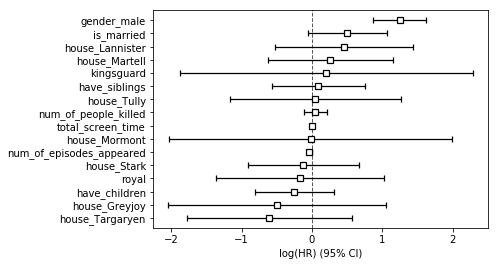

In [112]:
cph.plot()

In [113]:
# import pandas as pd
# import numpy as np


# corr = df_dummy.corr()
# corr.style.background_gradient(cmap='coolwarm')

In [ ]:
cph.predict_survival_function()

In [130]:
#tr_rows = df_dummy.iloc[10:20, ]
#tr_rows = df_dummy.iloc[character_df.index[(character_df.house.notnull()) & (character_df.house.str.contains('Stark'))].tolist(), ]

#df_dummy = df_dummy.set_index('character_name')
tr_rows = df_dummy[df_dummy.character_name.isin(['Tyrion Lannister','Arya Stark','Cersei Lannister','Jaime Lannister','Jon Snow','Sansa Stark','Daenerys Targaryen'])]
# tr_rows = df_dummy[['Tyrion Lannister','Arya Stark','Cersei Lannister','Jaime Lannister','Jon Snow','Sansa Stark','Daenerys Targaryen'],:]
tr_rows = tr_rows.set_index('character_name')
# cph.predict_survival_function(tr_rows).plot(use_index=False)
cph.predict_survival_function(tr_rows, [50,67])#.plot(use_index=False)

,Arya Stark,Cersei Lannister,Daenerys Targaryen,Jaime Lannister,Jon Snow,Sansa Stark,Tyrion Lannister
50,0.937627,0.893273,0.946043,0.705566,0.776882,0.924013,0.641785
67,0.887144,0.810704,0.902008,0.522852,0.625362,0.863344,0.438399


In [133]:
# cph.predict_percentile(tr_rows,p=0.9)
cph.predict_cumulative_hazard(tr_rows,[67])

Arya Stark            0.119748
Cersei Lannister      0.209852
Daenerys Targaryen    0.103132
Jaime Lannister       0.648457
Jon Snow              0.469424
Sansa Stark           0.146942
Tyrion Lannister      0.824625
Name: 67, dtype: float64

In [181]:
dir(cph)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_batch_mode',
 '_check_values',
 '_clusters',
 '_compute_baseline_cumulative_hazard',
 '_compute_baseline_hazard',
 '_compute_baseline_hazards',
 '_compute_baseline_survival',
 '_compute_confidence_intervals',
 '_compute_delta_beta',
 '_compute_deviance',
 '_compute_likelihood_ratio_test',
 '_compute_martingale',
 '_compute_p_values',
 '_compute_sandwich_estimator',
 '_compute_scaled_schoenfeld',
 '_compute_schoenfeld',
 '_compute_schoenfeld_within_strata',
 '_compute_score',
 '_compute_score_within_strata',
 '_compute_standard_errors',
 '_compute_z_values',
 '_concordance_score_',
 '_get_efron_values_batch',
 '_get_efro

In [127]:
# df_dummy[df_dummy['is_dead']==0]['character_name'].values